## Project Name: House Prices: Advanced Regression Techniques

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv(r"Pictures\house price prediction ames city.csv")


In [3]:
df.shape

(1460, 20)

In [4]:
pd.set_option("display.max_columns",None)


In [5]:
df.head()

,Id,MSZoning,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,RL,CollgCr,7,2003,2003,Gd,Ex,Y,856,1710,1,Gd,0,Attchd,RFn,2,Y,Normal,208500
1,2,RL,Veenker,6,1976,1976,Gd,Ex,Y,1262,1262,0,TA,1,Attchd,RFn,2,Y,Normal,181500
2,3,RL,CollgCr,7,2001,2002,Gd,Ex,Y,920,1786,1,Gd,1,Attchd,RFn,2,Y,Normal,223500
3,4,RL,Crawfor,7,1915,1970,TA,Gd,Y,961,1717,1,Gd,1,Detchd,Unf,3,Y,Abnorml,140000
4,5,RL,NoRidge,8,2000,2000,Gd,Ex,Y,1145,2198,1,Gd,1,Attchd,RFn,3,Y,Normal,250000


### Statistics

In [6]:
df.describe()

,Id,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,BsmtFullBath,Fireplaces,GarageCars,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,6.099315,1971.267808,1984.865753,1162.626712,1515.463699,0.425342,0.613014,1.767123,180921.195890
std,421.610009,1.382997,30.202904,20.645407,386.587738,525.480383,0.518911,0.644666,0.747315,79442.502883
min,1.000000,1.000000,1872.000000,1950.000000,334.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,5.000000,1954.000000,1967.000000,882.000000,1129.500000,0.000000,0.000000,1.000000,129975.000000
50%,730.500000,6.000000,1973.000000,1994.000000,1087.000000,1464.000000,0.000000,1.000000,2.000000,163000.000000
75%,1095.250000,7.000000,2000.000000,2004.000000,1391.250000,1776.750000,1.000000,1.000000,2.000000,214000.000000
max,1460.000000,10.000000,2010.000000,2010.000000,4692.000000,5642.000000,3.000000,3.000000,4.000000,755000.000000


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

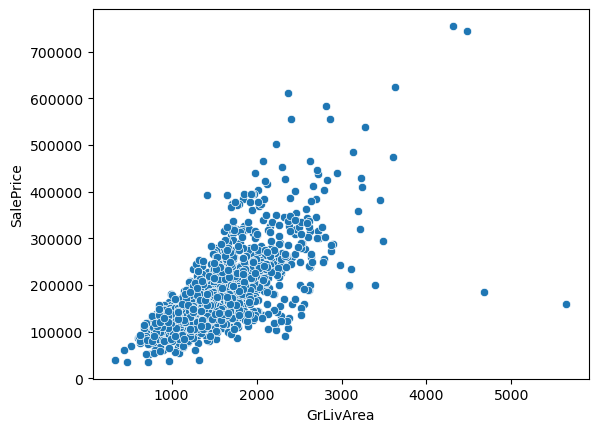

In [7]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

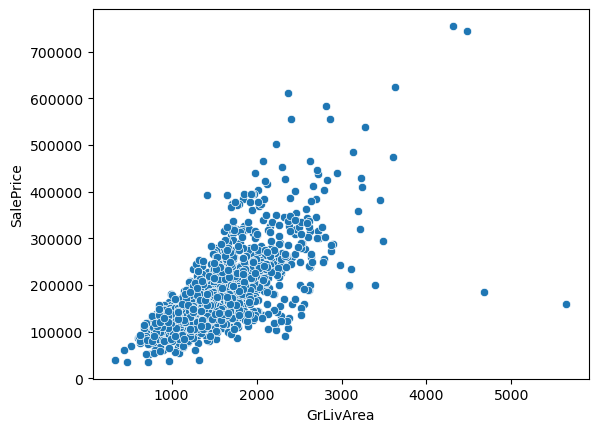

In [8]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])

## Dataset Parameters 


MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
       
 Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
       
 OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
 YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    
 
 BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

       
 HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 
 CentralAir: Central air conditioning

       N	No
       Y	Yes
       
 1stFlrSF: First Floor square feet
 
 GrLivArea: Above grade (ground) living area square feet
 
 BsmtFullBath: Basement full bathrooms
 
 KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
 Fireplaces: Number of fireplaces
 
 
       
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage


GarageCars: Size of garage in car capacity

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
       
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In Data Analysis We will Analyze To Find out the below stuff

1 Missing Values

2 All The Numerical Variables

3 Distribution of the Numerical Variables

4 Categorical Variables

5 Cardinality of Categorical Variables

6 Outliers

7 Relationship between independent and dependent feature(SalePrice)

### Missing Values

In [9]:
# total missing values
df.isnull().sum()

Id                0
MSZoning          0
Neighborhood      0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
BsmtQual         37
HeatingQC         0
CentralAir        0
1stFlrSF          0
GrLivArea         0
BsmtFullBath      0
KitchenQual       0
Fireplaces        0
GarageType       81
GarageFinish     81
GarageCars        0
PavedDrive        0
SaleCondition     0
SalePrice         0
dtype: int64

In [10]:
df.drop('Id', inplace=True, axis=1)

## Numerical Variables

In [11]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  9


,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,BsmtFullBath,Fireplaces,GarageCars,SalePrice
0,7,2003,2003,856,1710,1,0,2,208500
1,6,1976,1976,1262,1262,0,1,2,181500
2,7,2001,2002,920,1786,1,1,2,223500
3,7,1915,1970,961,1717,1,1,3,140000
4,8,2000,2000,1145,2198,1,1,3,250000


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

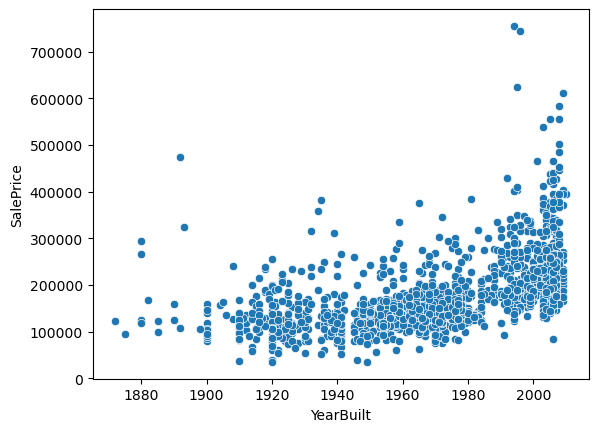

In [12]:
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

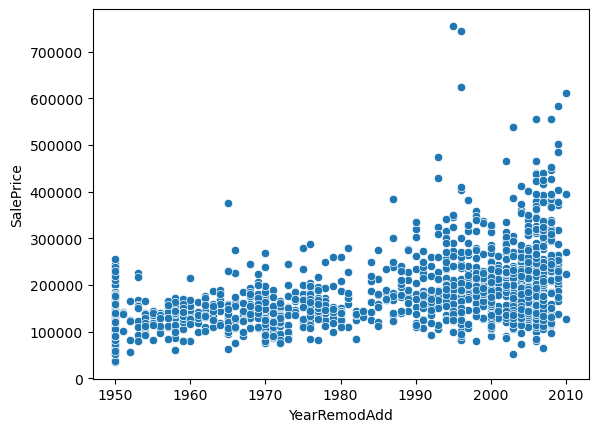

In [13]:
sns.scatterplot(x=df['YearRemodAdd'], y=df['SalePrice'])

We can clearly observe that sale price and year built are positively correlated. Similarly We can clearly observe that sale price and year re-modification are positively correlated.

In [14]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd']

##  Numerical variables are usually of 2 type
###  1.  Discrete Variables


In [15]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [16]:
df[discrete_feature].head()

,OverallQual,BsmtFullBath,Fireplaces,GarageCars
0,7,1,0,2
1,6,0,1,2
2,7,1,1,2
3,7,1,1,3
4,8,1,1,3


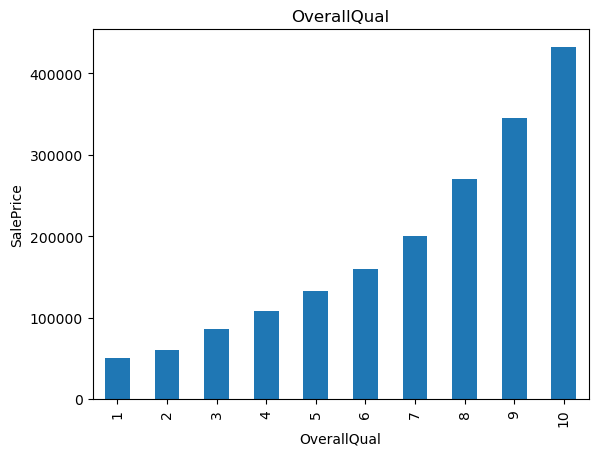

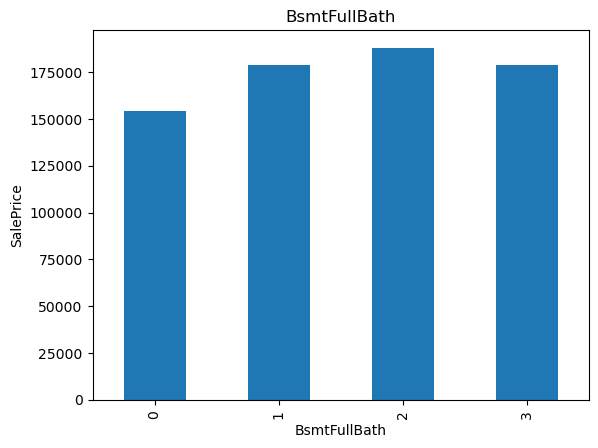

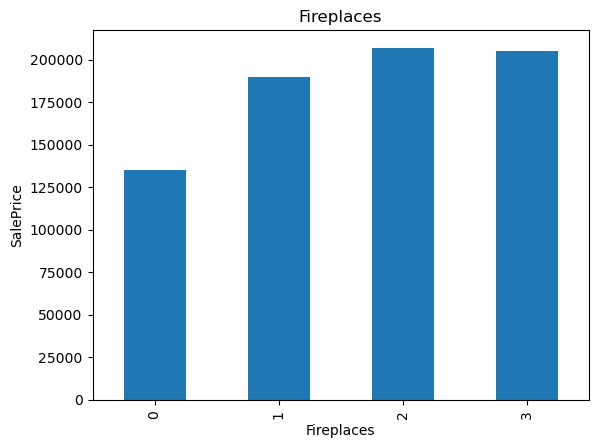

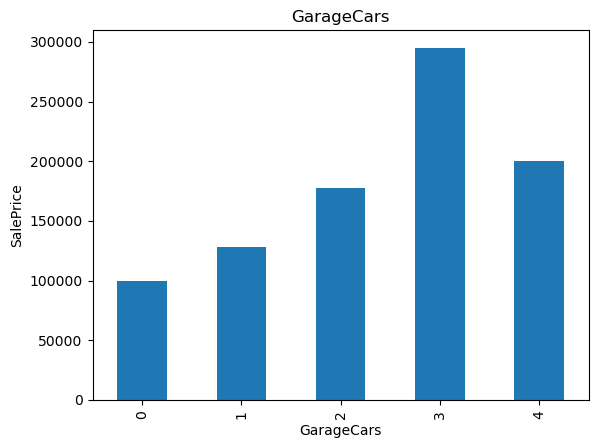

In [17]:
## Lets Find the realtionship between discrete features and Sale PRice

for feature in discrete_feature:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

It can be seen overall quality of house is very excellent than the sale price is high. If there are 2 full basement baths than sale price is high. When fire places are two or more than sale price is also high. 

###  Continuous Variable

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [19]:
continuous_feature

['1stFlrSF', 'GrLivArea', 'SalePrice']

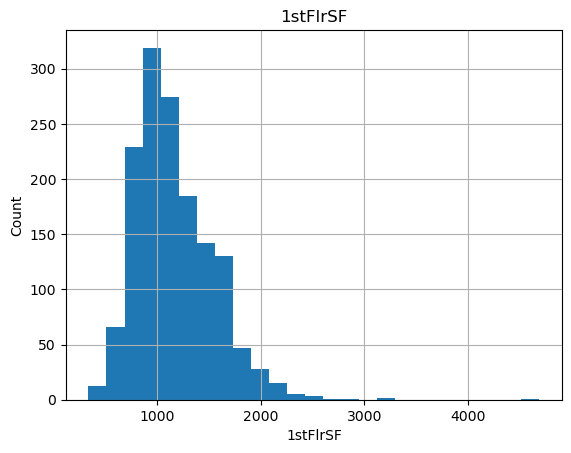

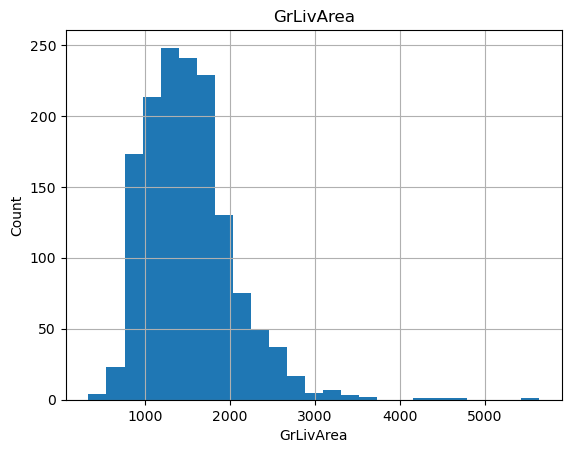

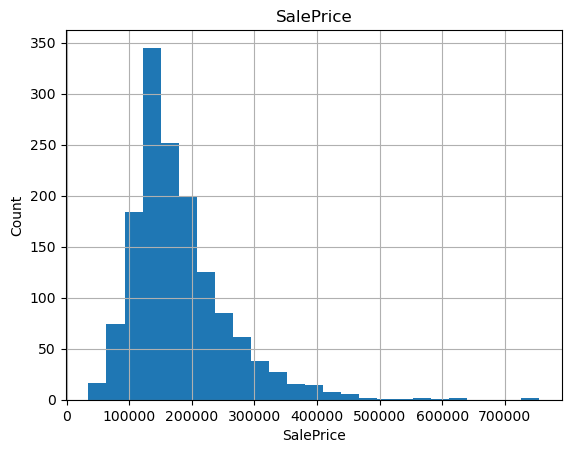

In [20]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers

[]

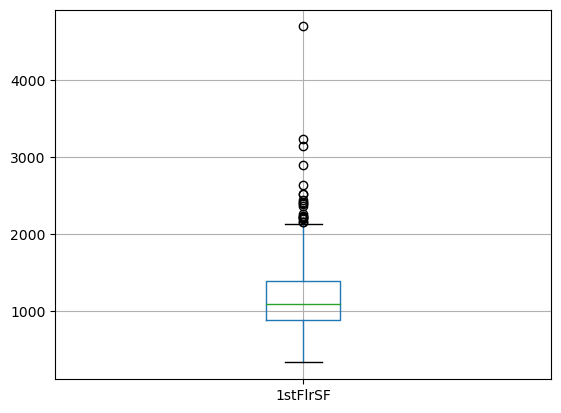

In [21]:
b_plot = df.boxplot(column = ['1stFlrSF']) 
b_plot.plot() 

[]

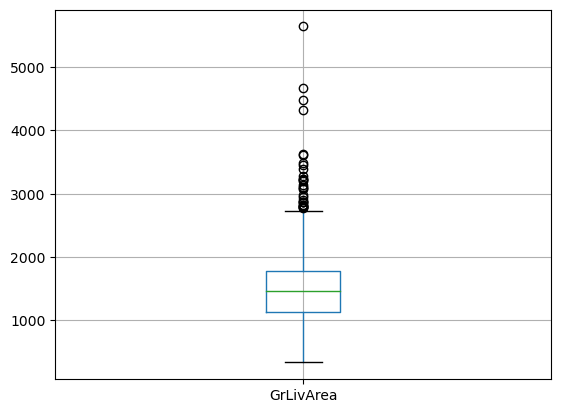

In [22]:
b_plot = df.boxplot(column = ['GrLivArea']) 
b_plot.plot() 

[]

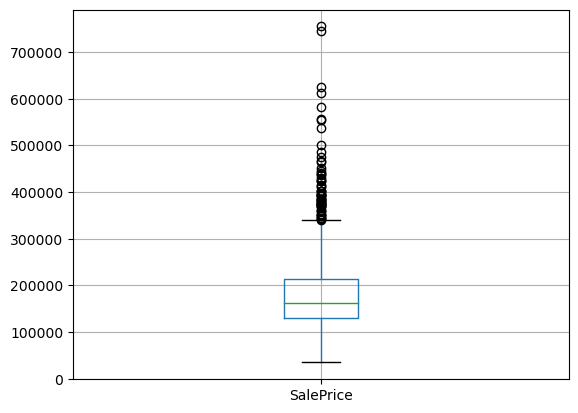

In [23]:
b_plot = df.boxplot(column = ['SalePrice']) 
b_plot.plot() 

### Categorical Variable

In [24]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Neighborhood',
 'BsmtQual',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleCondition']

### Check for cardinalities

In [25]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Neighborhood and number of categories are 25
The feature is BsmtQual and number of categories are 5
The feature is HeatingQC and number of categories are 5
The feature is CentralAir and number of categories are 2
The feature is KitchenQual and number of categories are 4
The feature is GarageType and number of categories are 7
The feature is GarageFinish and number of categories are 4
The feature is PavedDrive and number of categories are 3
The feature is SaleCondition and number of categories are 6


### Find out the relationship between categorical variable and dependent feature SalesPrice

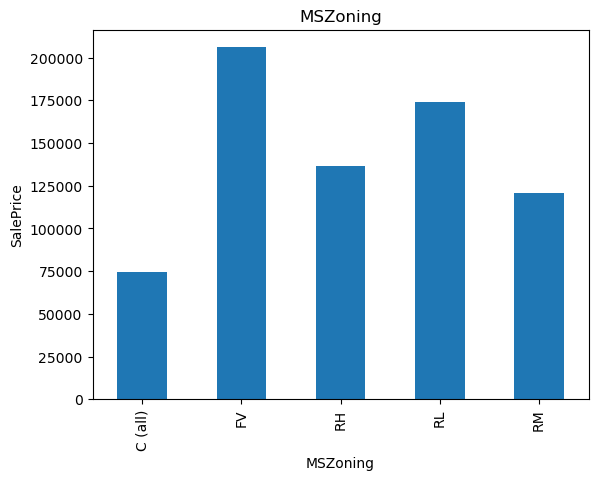

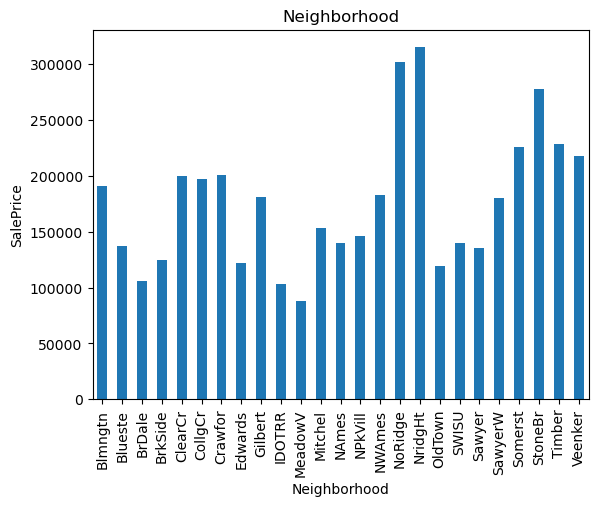

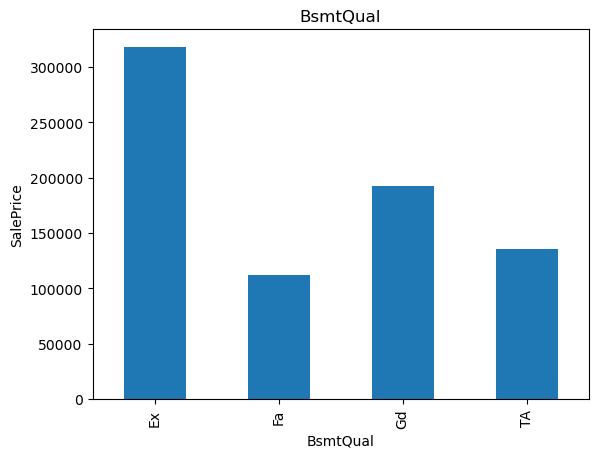

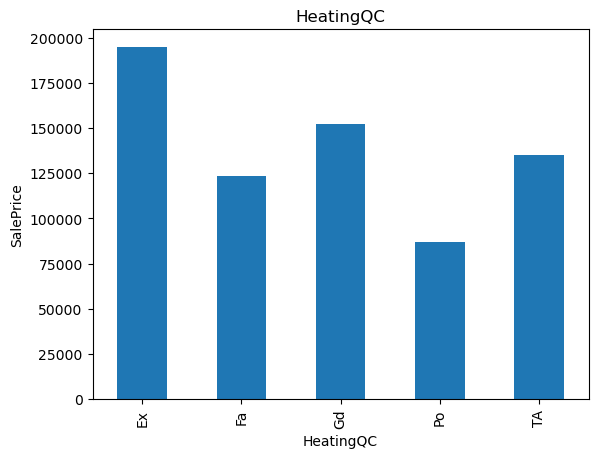

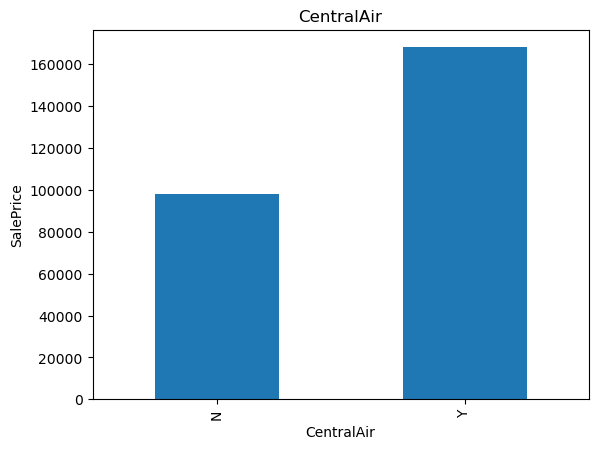

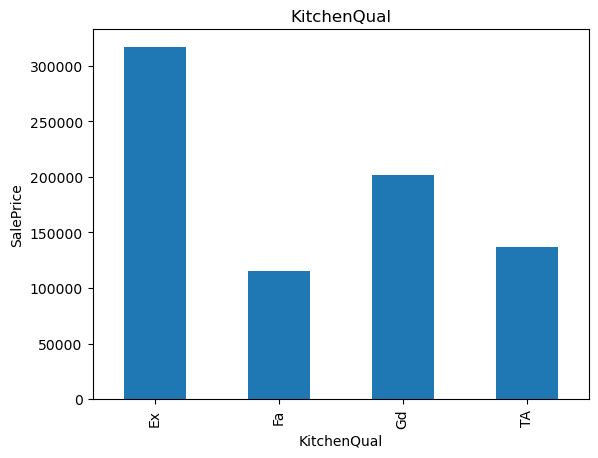

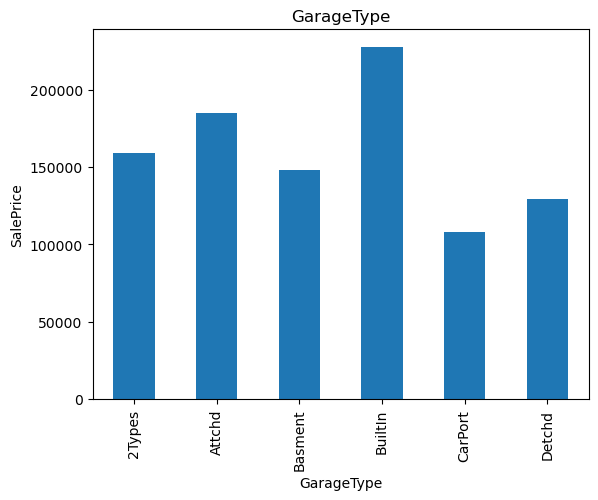

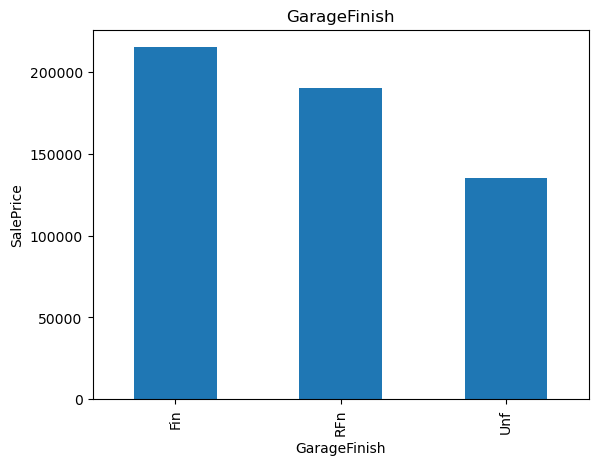

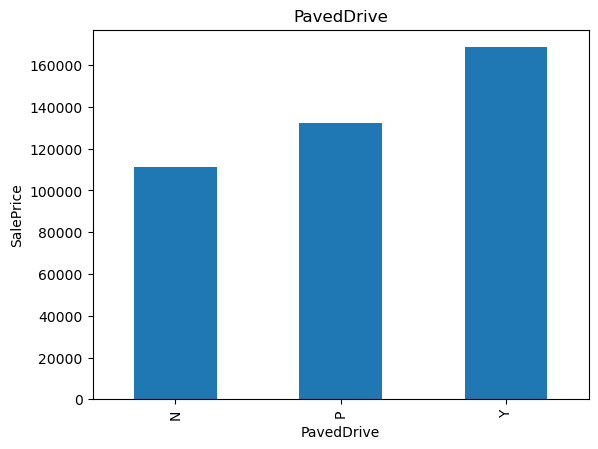

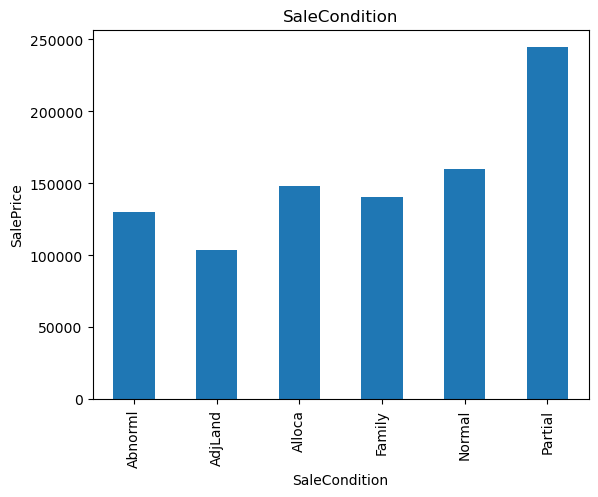

In [26]:
for feature in categorical_features:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

1 Sale Price is high for Floating Village Residential.

2 Sale Price is high for places near Northridge Heights.

3 Sale Price is high for height of the basement is excellent and >100 inches.

4 Sale Price is high when Heating quality and condition is excellent.

5 Sale Price is high when Central air conditioning is available.

6 Sale Price is high when Kitchen quality is excellent.

7 Price for the houses is high when Built-In (Garage part of house - typically has room above garage).

8 Price for the houses is high when Interior finish of the garage is finished.

9 Price for the houses is high with Paved driveway.

10 Sale Price is high when sale condition is partial. Home was not completed when last assessed (associated with New Homes)